# Understanding Your Chances in a Roulette Game

## 📌 Objective

Explore the mathematical foundations behind roulette outcomes and understand **why the house always wins**. The goal is to simulate multiple betting strategies and visualize how probability and game design impact long-term outcomes.


## 🧠 Background

People often think games of chance are fair – a coin flip, a dice roll – each with equal outcomes. But when it comes to casino games like Roulette, the odds are designed not in the player’s favor.
We’ll simulate:
- A fair coin flip
- A standard 6-sided die
- European vs. American Roulette
- Different roulette betting strategies

In [17]:
# import libraries
import matplotlib.pyplot as plt
import random
import seaborn as sns

## 🎲 When probability is on your side

### 🧪 Simulating Fair Coin Flips

In this experiment, we simulate flipping a fair coin 10, 100, 1000, and 10000 times.

The goal is to observe how the cumulative probability of getting heads evolves with more coin flips. A fair coin means there's an equal chance (0.5) of getting heads ('H') or tails ('T') on each flip. For each number of flips, we calculate and plot the cumulative probability of heads after each toss.

The green horizontal line at 0.5 represents the expected theoretical probability of heads. As the number of flips increases, the cumulative probability tends to stabilize and approach 0.5, illustrating the Law of Large Numbers — the idea that the average outcome gets closer to the expected value as the number of trials grows.


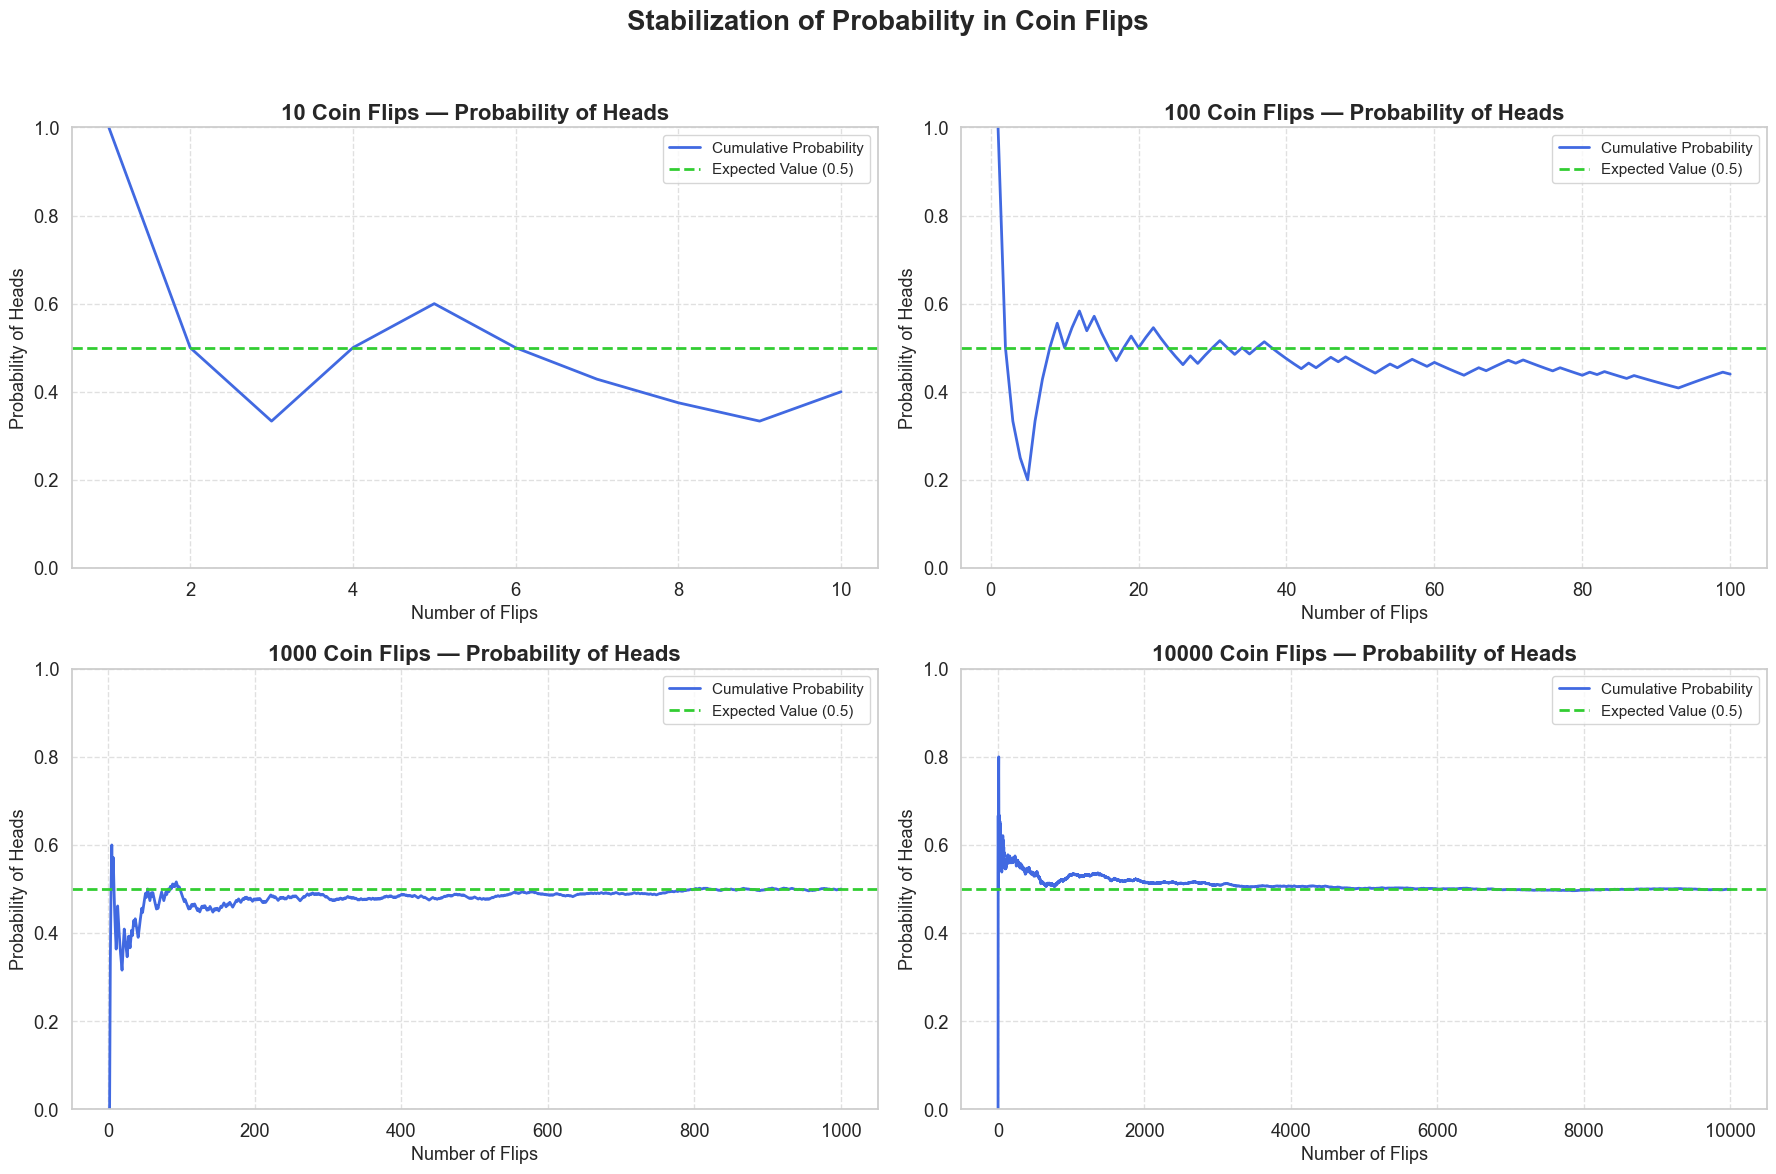

In [33]:
# Set a clean Seaborn style
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

list_of_n = [10, 100, 1000, 10000]
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

for idx, n in enumerate(list_of_n):
    total_flips = 0
    numerical_probability = []
    H_count = 0

    for i in range(n):
        new_flip = random.choice(['H', 'T'])
        total_flips += 1
        if new_flip == 'H':
            H_count += 1
        numerical_probability.append(H_count / total_flips)

    ax = axs[idx // 2, idx % 2]
    ax.plot(range(1, n + 1), numerical_probability,
            color='royalblue', linewidth=2, label='Cumulative Probability')
    ax.axhline(y=0.5, color='limegreen', linestyle='--', linewidth=2,
               label='Expected Value (0.5)')

    ax.set_title(f'{n} Coin Flips — Probability of Heads', fontsize=16, fontweight='bold')
    ax.set_xlabel('Number of Flips', fontsize=13)
    ax.set_ylabel('Probability of Heads', fontsize=13)
    ax.set_ylim(0, 1)
    ax.legend(loc='upper right', fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.suptitle("Stabilization of Probability in Coin Flips", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



✅ Insight: As the number of flips increases, the probability of heads converges to the expected value of 0.5.

### 🎯 Dice Throws: Converging to the Mean

In this experiment, we simulate rolling a fair six-sided die 10, 100, 1000, and 10000 times.

The goal is to observe how the cumulative average of the dice rolls changes with more throws. Each die roll results in a random integer from 1 to 6, with all outcomes being equally likely. For each sequence of rolls, we calculate and plot the cumulative average after every throw.

The green horizontal line at 3.5 represents the theoretical expected value of a fair six-sided die. As the number of rolls increases, the cumulative average tends to stabilize and converge toward 3.5, demonstrating the Law of Large Numbers — which states that the average of the results obtained from a large number of trials should be close to the expected value.


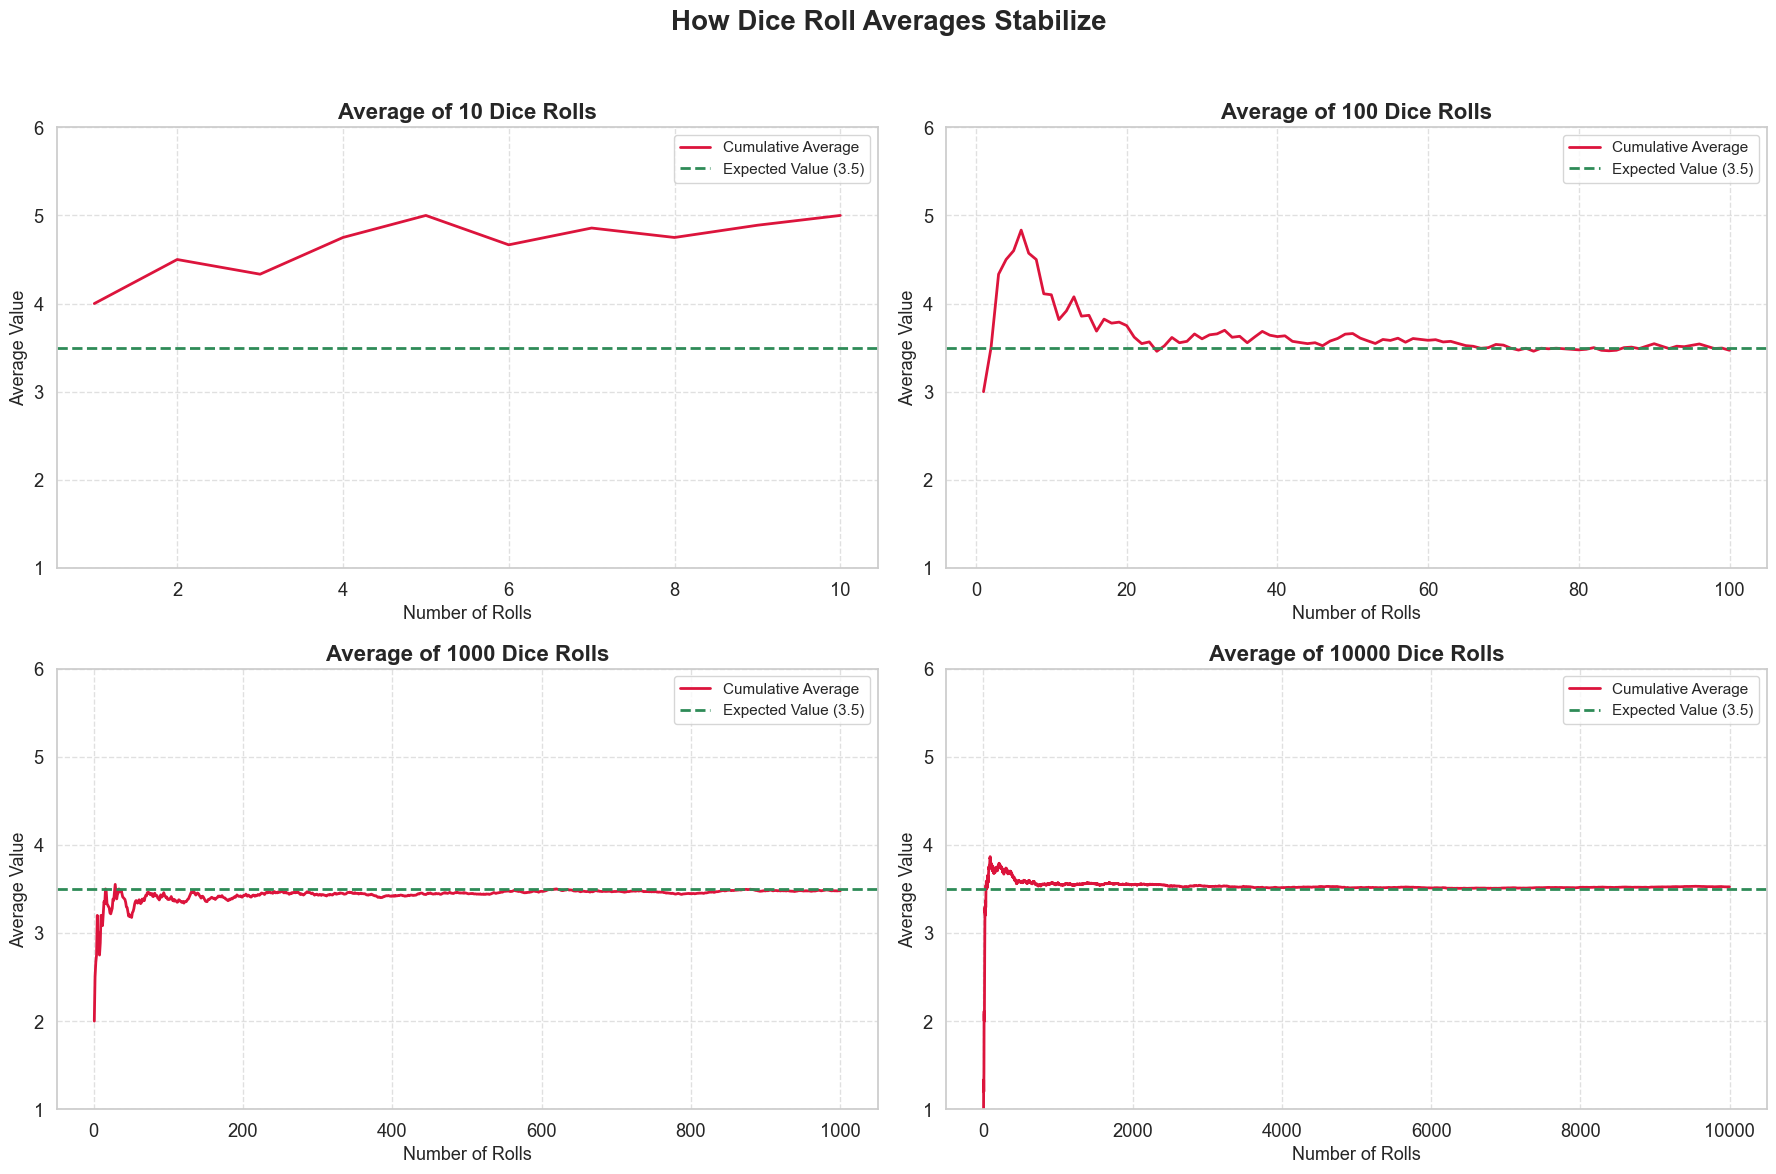

In [35]:
# Set clean style
sns.set(style="whitegrid", palette="deep", font_scale=1.2)

list_of_n = [10, 100, 1000, 10000]
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

for idx, n in enumerate(list_of_n):
    results = []
    cumulative_avg = []

    for i in range(n):
        roll = random.randint(1, 6)
        results.append(roll)
        cumulative_avg.append(sum(results) / len(results))

    ax = axs[idx // 2, idx % 2]
    ax.plot(range(1, n + 1), cumulative_avg,
            color='crimson', linewidth=2, label='Cumulative Average')
    ax.axhline(y=3.5, color='seagreen', linestyle='--', linewidth=2,
               label='Expected Value (3.5)')

    ax.set_title(f'Average of {n} Dice Rolls', fontsize=16, fontweight='bold')
    ax.set_xlabel('Number of Rolls', fontsize=13)
    ax.set_ylabel('Average Value', fontsize=13)
    ax.set_ylim(1, 6)
    ax.legend(loc='upper right', fontsize=11)  # <- Здесь легенда справа
    ax.grid(True, linestyle='--', alpha=0.6)

plt.suptitle("How Dice Roll Averages Stabilize", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


✅ Insight: As with coin flips, the average of dice rolls approaches its expected value (3.5) over time.


## 🎰 Roulette: Where Probability Turns Against You

Roulette may *feel* fair, but it's subtly tilted against the player due to the presence of zero (or double zero) slots. We'll compare two main variants:

- 🎯 **European Roulette**: 37 slots (numbers 1–36 and a single 0)
- 🧨 **American Roulette**: 38 slots (numbers 1–36, a 0, and a 00)

In this section, we’ll analyze how the house edge affects different betting strategies by simulating and visualizing outcomes for the following approaches:

1. 💸 **Betting on Red/Black**
   - A simple 1:1 payout bet where players bet on either red or black.
   - We'll compare how this strategy performs in European vs. American roulette.

2. 🎯 **Betting on a Single Number**
   - A high-risk, high-reward 35:1 payout bet on one specific number.
   - We'll track outcomes over many spins to highlight expected returns.

3. 🧠 **Betting on All Numbers at Once?**
   - What happens if you bet on every number at the same time?
   - This counterintuitive experiment helps uncover the hidden house advantage even when you cover the entire board.

Each of these strategies will help illustrate how roulette odds work and why the house always has an edge, no matter how you play.


#### 💸 Betting on Red/Black – European vs. American


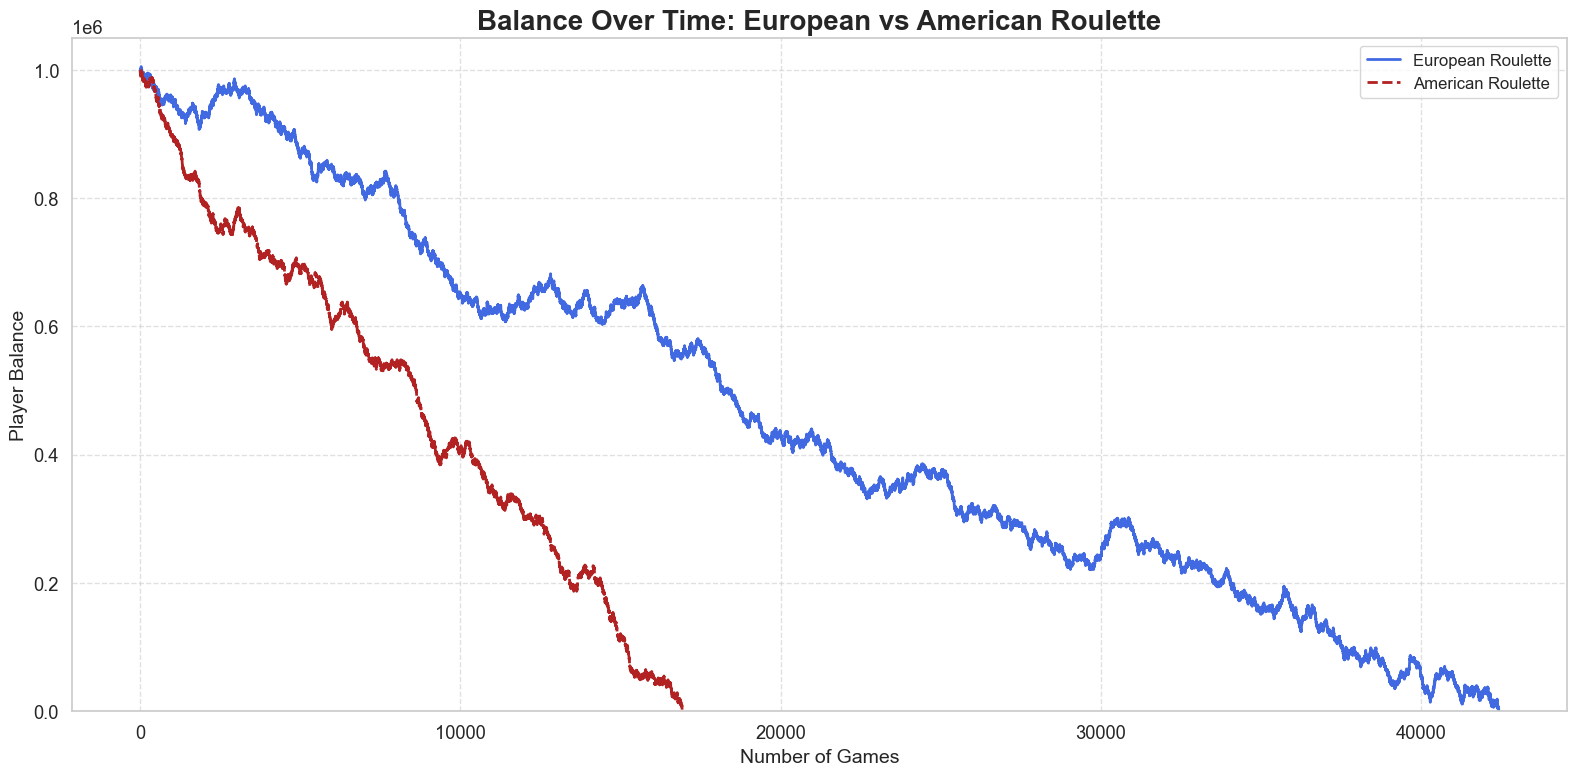

In [21]:
# Style setup
sns.set(style="whitegrid", font_scale=1.2)

startmoney = 1_000_000
c1 = 0.001

def simulate_roulette(slots, label):
    money = startmoney
    history = []
    games = 0
    while money > 0:
        bet = min(money, startmoney * c1)
        money -= bet
        spin = random.randint(1, slots)
        if spin <= 18:
            money += bet * 2
        history.append(money)
        games += 1
    return history, games

# Run simulations
eu_balance, eu_games = simulate_roulette(37, "European")
us_balance, us_games = simulate_roulette(38, "American")

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(range(eu_games), eu_balance,
         label='European Roulette', color='royalblue', linewidth=2)
plt.plot(range(us_games), us_balance,
         label='American Roulette', color='firebrick', linestyle='--', linewidth=2)

# Labels and styling
plt.title('Balance Over Time: European vs American Roulette', fontsize=20, fontweight='bold')
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Player Balance', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.ylim(0, startmoney * 1.05)

plt.show()



✅ Insight: European roulette gives you slightly better odds, but both ultimately drain your bankroll.


### 🔍 The Hidden Trap – House Edge

In [7]:
# European
slots_eu = 37
win_rate_eu = 18 / slots_eu * 100
print(f"European Roulette win chance (Red/Black): {win_rate_eu:.2f}%")

# American
slots_us = 38
win_rate_us = 18 / slots_us * 100
print(f"American Roulette win chance (Red/Black): {win_rate_us:.2f}%")

European Roulette win chance (Red/Black): 48.65%
American Roulette win chance (Red/Black): 47.37%


✅ Insight:
- European: ~48.65% chance to win
- American: ~47.37%

**The House Edge: Small per Spin, Devastating Over Time**
The house edge is the casino’s built-in advantage in every game, representing the average percentage of each bet that the casino expects to retain over time. While this edge may seem small on any single spin or bet, its cumulative effect is powerful and inevitable—ensuring the casino’s consistent long-term profit. Players might not feel the impact right away, but over many plays, the house edge guarantees that the casino always comes out ahead.

### 🎯 **Betting on a Single Number**


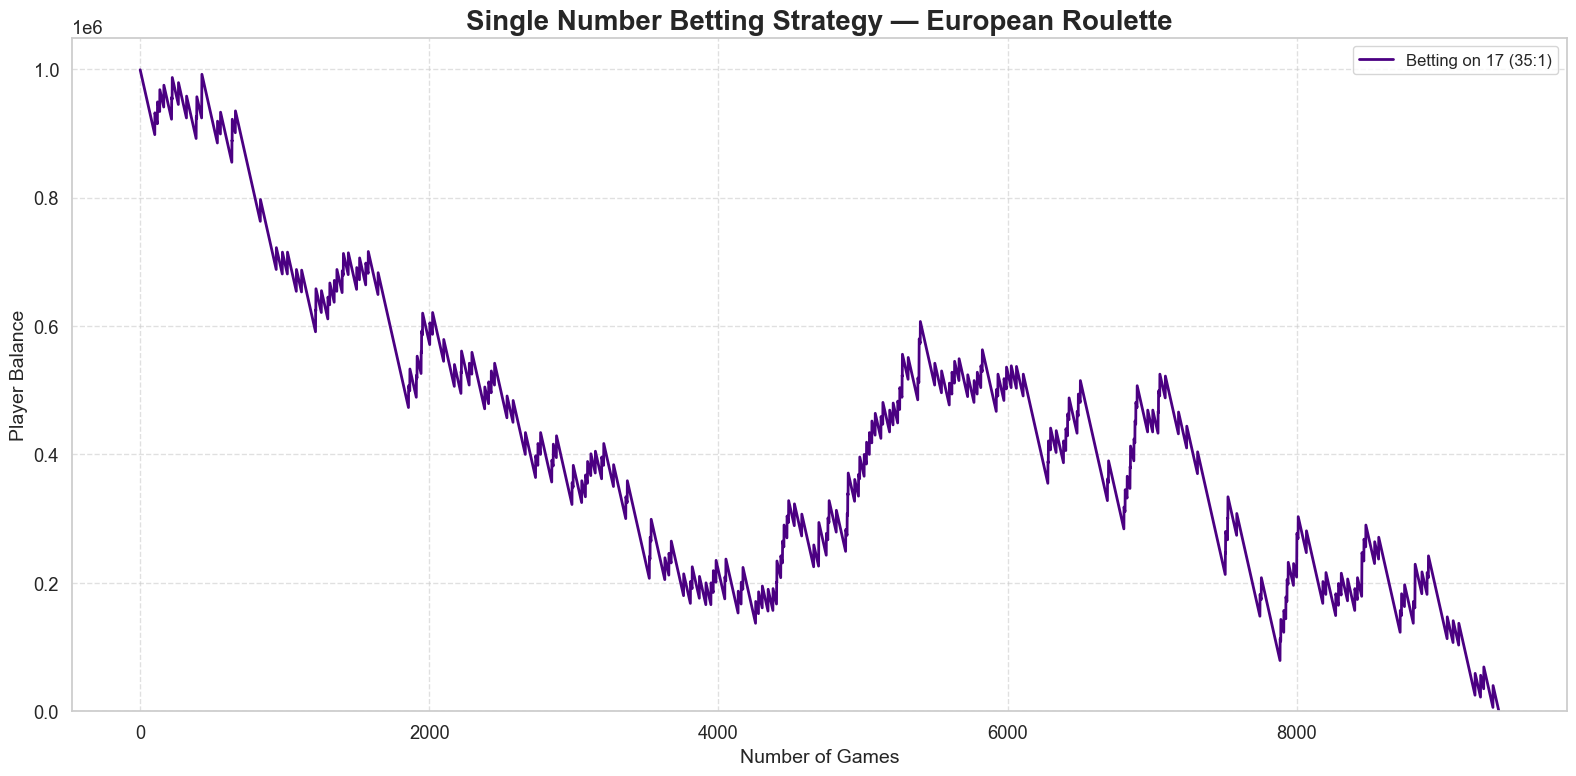

Games played: 9,400, Wins: 240, Final balance: 0.0


In [31]:
# Set visual style
sns.set(style="whitegrid", font_scale=1.2)

# Parameters
startmoney = 1_000_000
c = 0.001
payout_ratio = 35
max_games = 100_000

# Simulation
money = startmoney
balance = []
wins = 0
games = 0

while money > 0 and games < max_games:
    bet = min(money, startmoney * c)
    money -= bet
    spin = random.randint(0, 36)
    if spin == 17:
        money += bet * payout_ratio
        wins += 1
    balance.append(money)
    games += 1

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(range(games), balance, color='indigo', linewidth=2, label='Betting on 17 (35:1)')

plt.title('Single Number Betting Strategy — European Roulette', fontsize=20, fontweight='bold')
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Player Balance', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.ylim(0, max(startmoney, max(balance) * 1.05))

plt.show()

# Print summary
print(f"Games played: {games:,}, Wins: {wins}, Final balance: {money:,}")


✅ Insight: The big win payout seems tempting, but the true odds (1 in 37) don’t justify the 35:1 reward. You're statistically destined to lose.

### 🧠 **Betting on All Numbers at Once?**

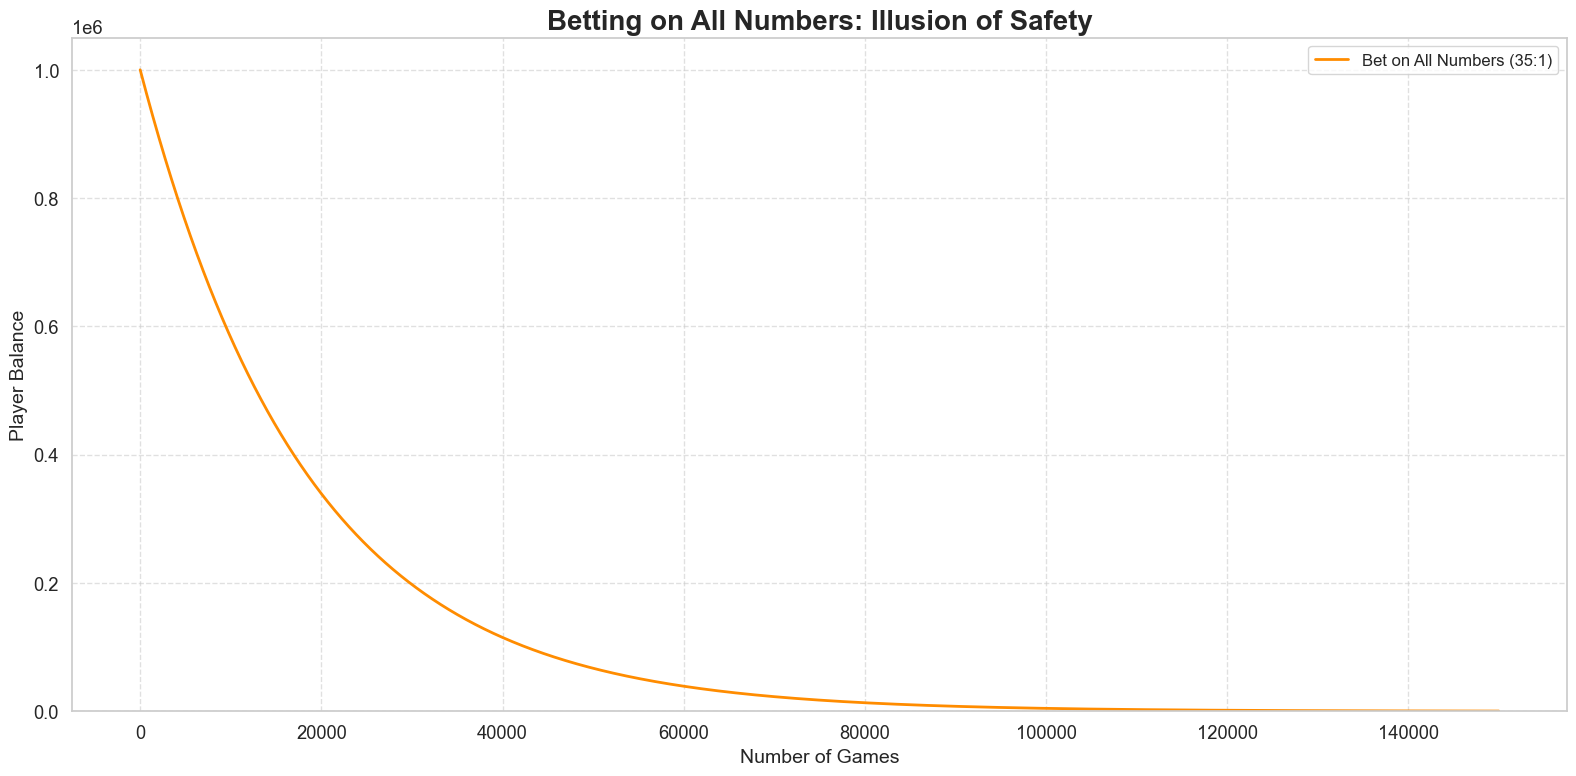

In [32]:
# Style setup
sns.set(style="whitegrid", font_scale=1.2)

# Parameters
startmoney = 1_000_000
c = 0.001
payout_ratio = 35

money = startmoney
balance = []
games = 0
max_games = 150_000

while money > 0 and games < max_games:
    total_bet = min(money, money * c)  # Bet fraction of current money
    bet_per_number = total_bet / 37    # Evenly spread on all numbers
    money -= total_bet
    spin = random.randint(0, 36)
    # If the spin matches any number, player wins payout on that bet
    money += bet_per_number * payout_ratio
    balance.append(money)
    games += 1

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(range(games), balance, color='darkorange', linewidth=2, label='Bet on All Numbers (35:1)')

plt.title('Betting on All Numbers: Illusion of Safety', fontsize=20, fontweight='bold')
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Player Balance', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.ylim(0, max(startmoney, max(balance) * 1.05))

plt.show()



✅ Insight: You “win” every round, but still lose money slowly. The payout (35:1) is less than the number of bets (37). That’s the house edge again.

## 📉 Final Thoughts & Takeaways
### 💡 Key Learnings
- All fair games (coin, dice) converge to their expected value with large samples.
- Roulette is mathematically rigged against the player.
- House edge is small per spin, but inevitable over time.
- The longer you play, the closer you get to guaranteed loss.

### ✅ Conclusion
- Roulette isn’t about luck, it’s about math.
- Casinos rely on small statistical advantages to ensure long-term profitability. While you might win short-term, the system ensures players lose on average.